## Context
- Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present more unique, personalized way of experiencing the world. This dataset describes the listing activity and metrics in NYC, NY for 2019.

## Content
- This data file includes all needed information to find out more about hosts, geographical availability, necessary metrics to make predictions and draw conclusions.

## Acknowledgements
- This public dataset is part of Airbnb, and the original source can be found on this website.

## Inspiration
- What can we learn about different hosts and areas?
- What can we learn from predictions? (ex: locations, prices, reviews, etc)
- Which hosts are the busiest and why?
- Is there any noticeable difference of traffic among different areas and what could be the reason for it?

In [1]:
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns 
import matplotlib.pyplot as plt 
from scipy.stats import norm

In [3]:
cd C:\Users\Administrator\Desktop\New Python Revision\AirBnb

C:\Users\Administrator\Desktop\New Python Revision\AirBnb


In [4]:
airbnb = pd.read_csv("AB_NYC_2019.csv")

In [5]:
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [6]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

In [7]:
airbnb.isnull().sum().sort_values(ascending=False)

reviews_per_month                 10052
last_review                       10052
host_name                            21
name                                 16
availability_365                      0
calculated_host_listings_count        0
number_of_reviews                     0
minimum_nights                        0
price                                 0
room_type                             0
longitude                             0
latitude                              0
neighbourhood                         0
neighbourhood_group                   0
host_id                               0
id                                    0
dtype: int64

In [8]:
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [9]:
airbnb.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

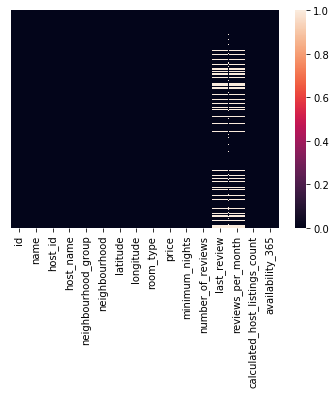

In [10]:
sns.heatmap(airbnb.isnull(),yticklabels=False )

## Droping the columns

In [11]:
airbnb.drop(["name","host_name"],axis = 1 , inplace = True)

In [12]:
airbnb.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [13]:
airbnb["reviews_per_month"]= airbnb["reviews_per_month"].fillna(0)
airbnb["last_review"] = airbnb["last_review"].fillna(0)

In [14]:
airbnb.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [15]:
airbnb.groupby(['room_type'])['reviews_per_month'].count()

room_type
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: reviews_per_month, dtype: int64

# Data Visualization 

## Types of Room 

Text(0.5, 1.0, 'room_type')

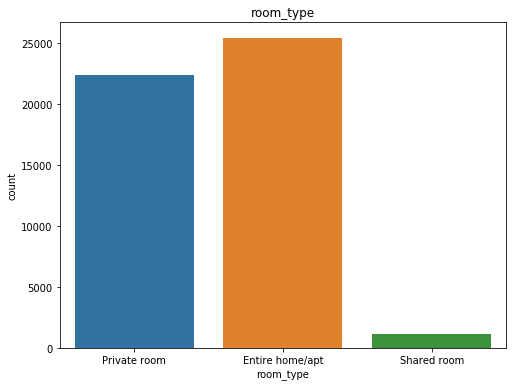

In [16]:
sns.countplot(airbnb["room_type"])
fig= plt.gcf()
fig.set_size_inches(8,6)
plt.title("room_type")

Text(0.5, 1.0, 'Most Visited')

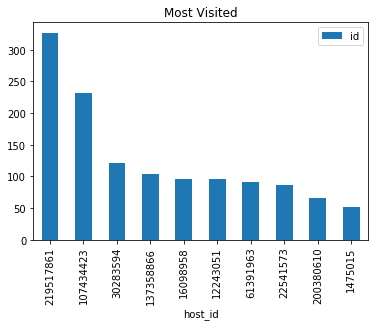

In [17]:
    most_visited = airbnb.groupby('host_id')[['id']].count().sort_values(ascending=False,by='id')
    most_visited.head(10).plot(kind='bar')
    plt.title("Most Visited")

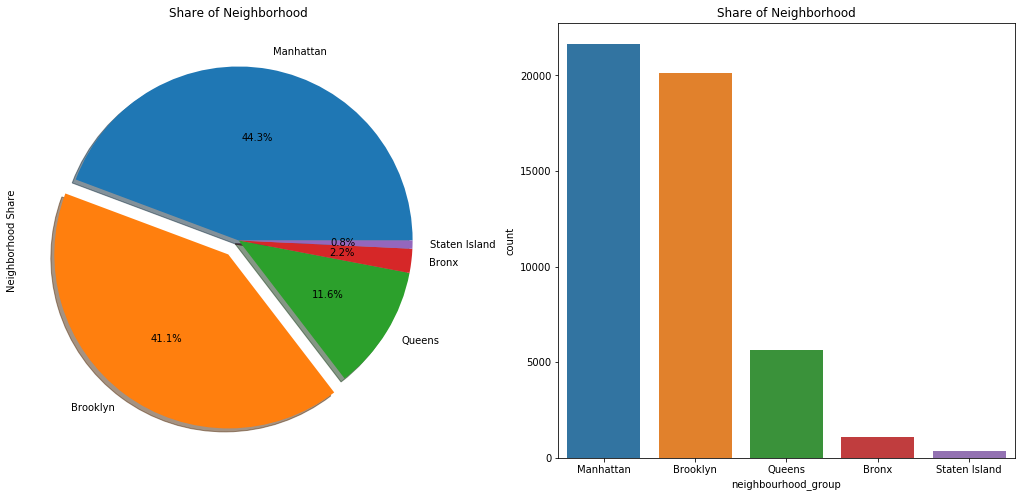

In [18]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.countplot('neighbourhood_group',data=airbnb,ax=ax[1],order=airbnb['neighbourhood_group'].value_counts().index)
ax[1].set_title('Share of Neighborhood')
airbnb['neighbourhood_group'].value_counts().plot.pie(explode=[0,0.1,0,0,0],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Share of Neighborhood')
ax[0].set_ylabel('Neighborhood Share')
plt.show()

### Manhatten and Brooklyn have the highest share of hotels

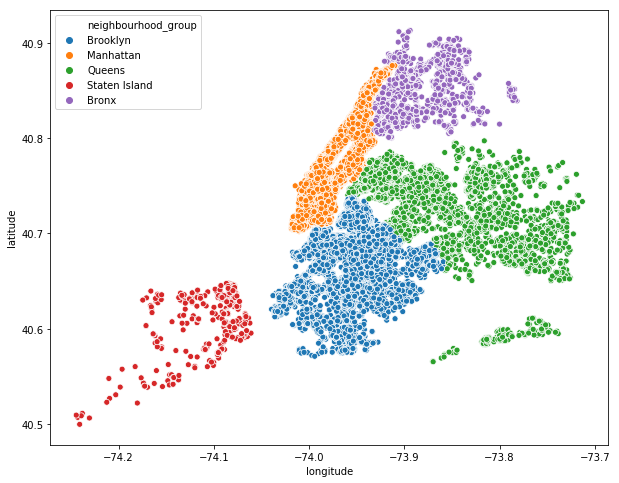

In [19]:
plt.figure(figsize = (10,8))
sns.scatterplot(airbnb.longitude ,airbnb.latitude, hue=airbnb.neighbourhood_group)
plt.show()

## Ploting the map of Neighobourhood

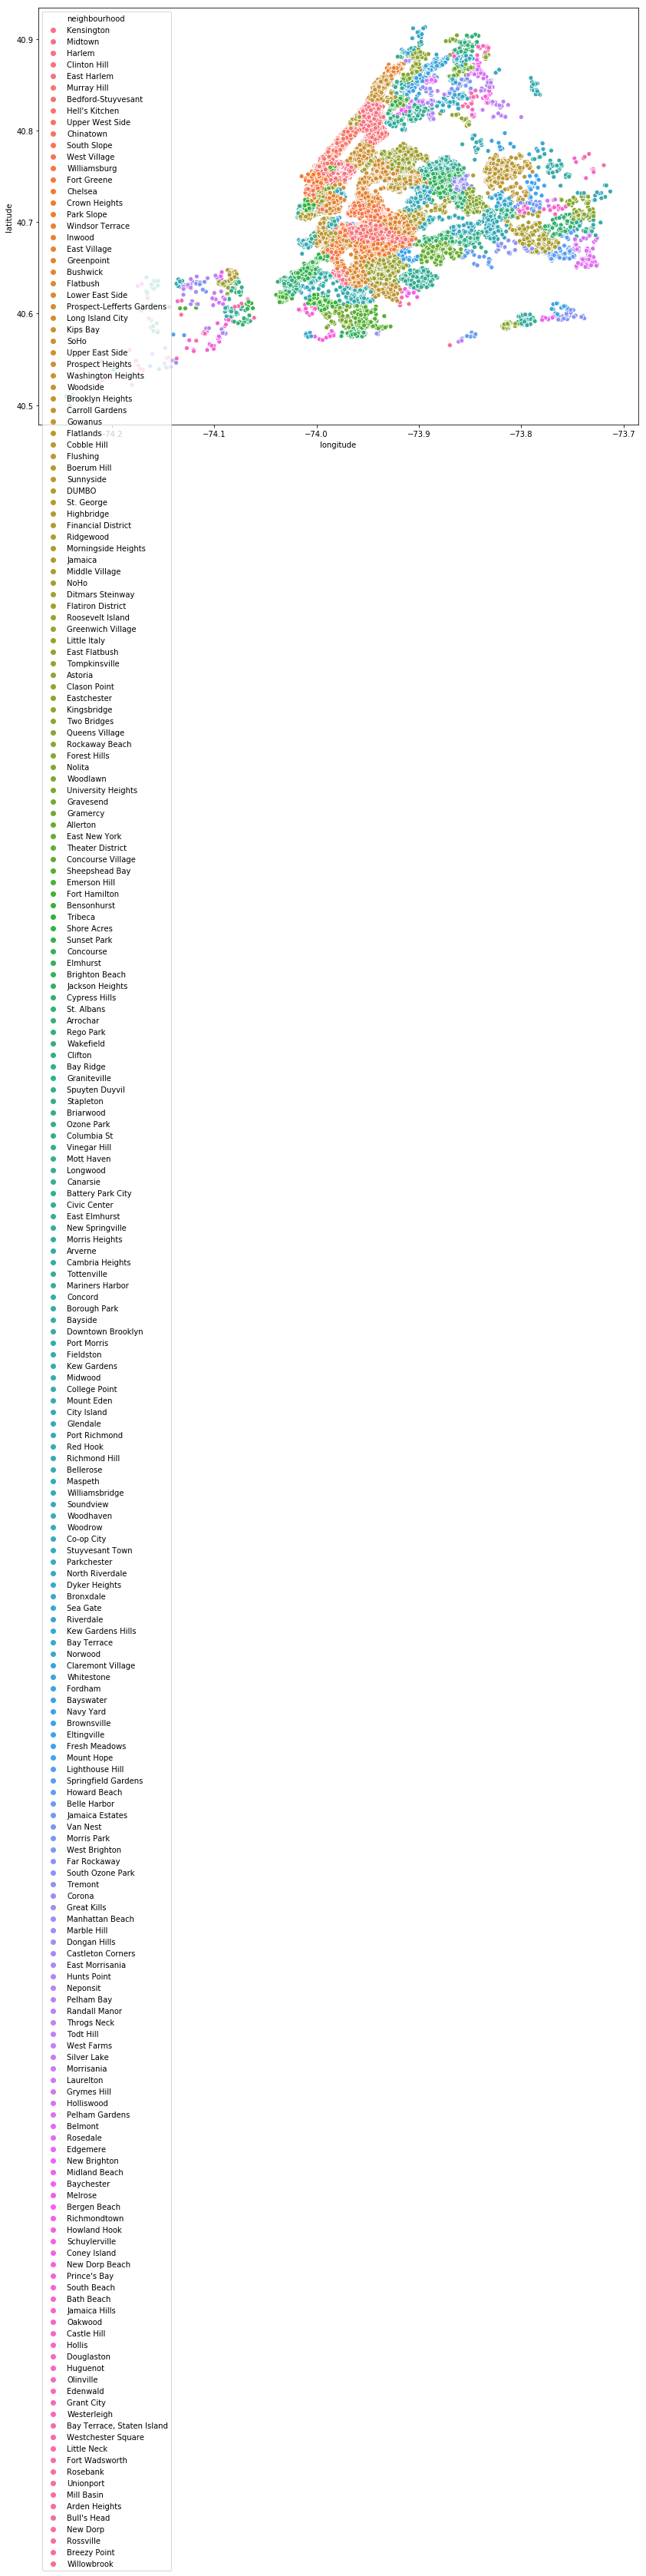

In [20]:
plt.figure(figsize= (14 ,10))
sns.scatterplot(airbnb.longitude , airbnb.latitude , hue =airbnb.neighbourhood)
plt.show()

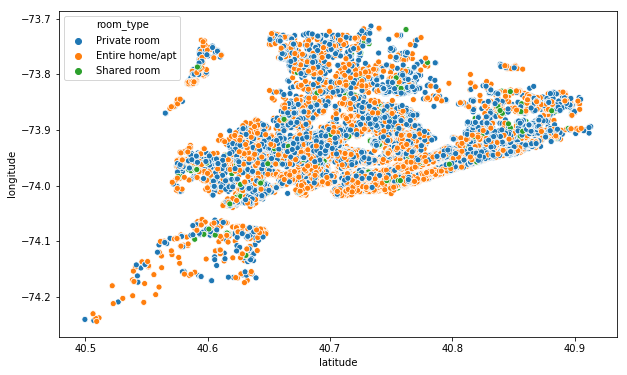

In [21]:
plt.figure(figsize=(10 , 6))
sns.scatterplot(airbnb.latitude,airbnb.longitude , hue=airbnb.room_type)

## Avaliability of room acording to locations by maping it 

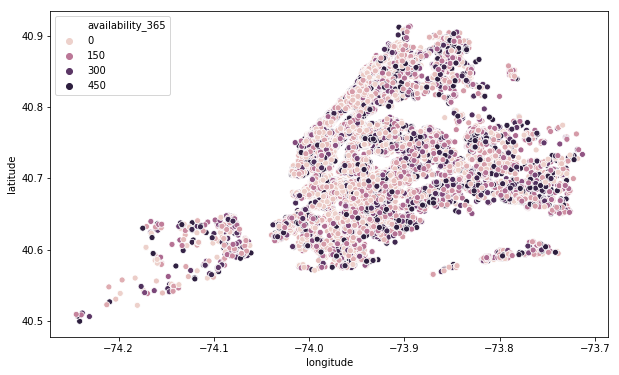

In [22]:
plt.figure(figsize=(10,6))
sns.scatterplot(airbnb.longitude , airbnb.latitude , hue = airbnb.availability_365 )
plt.show()

## This is the library of making the live map location

In [23]:
import folium
from folium.plugins import HeatMap

### Making of Heat map With live map

In [24]:
heat_map= folium.Map([40.913060 ,-73.712990], zoom_start= 10)
HeatMap(airbnb[["latitude","longitude"]] ,radius = 8 , gradient={0.2:'blue',0.4:'purple',0.6:'orange',1.0:'red'}).add_to(heat_map)
display(heat_map)

### Extracting multiple diffrent columns
- For learning that how to fetch the multiple columns

In [25]:
rooms_review_pre_month = airbnb.loc[:,["neighbourhood_group","room_type","last_review"]]
rooms_review_pre_month.head()

,neighbourhood_group,room_type,last_review
0,Brooklyn,Private room,2018-10-19
1,Manhattan,Entire home/apt,2019-05-21
2,Manhattan,Private room,0
3,Brooklyn,Entire home/apt,2019-07-05
4,Manhattan,Entire home/apt,2018-11-19


In [26]:
import statistics as stat
room_reviews= airbnb.groupby(["room_type"])[["number_of_reviews"]].count()
room_reviews

,number_of_reviews
room_type,
Entire home/apt,25409
Private room,22326
Shared room,1160


In [27]:
import seaborn as sb

#### this grapg shows that types of room and this reviews
#### Here We obseve that most offten rooms prefered by customer

Text(0.5, 1.0, 'Types of room & its review')

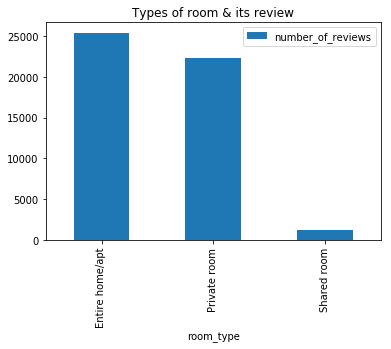

In [28]:
room_reviews.plot(kind="bar")
plt.legend(ncol=1,framealpha=0.8)
plt.title("Types of room & its review")

## Corelation maatrix

Index(['id', 'host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

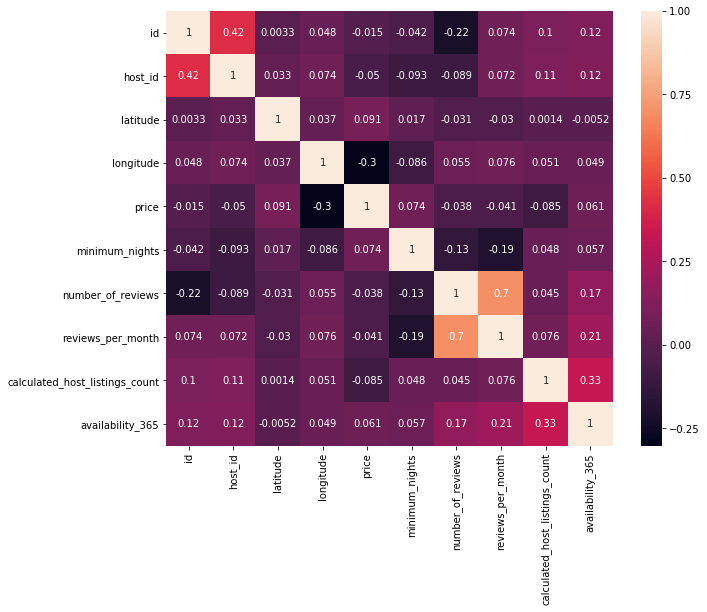

In [29]:
corrmat = airbnb.corr(method="kendall") 
plt.figure(figsize=(10,8))
sns.heatmap(corrmat ,annot = True)
airbnb.columns

In [30]:
airbnb.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,0.00,1,365
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [31]:
data_airbnb = airbnb.drop(["id","host_id" ,"neighbourhood","latitude","longitude" ,"last_review","number_of_reviews","reviews_per_month"],axis = True)
data_airbnb.head()

,neighbourhood_group,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,Brooklyn,Private room,149,1,6,365
1,Manhattan,Entire home/apt,225,1,2,355
2,Manhattan,Private room,150,3,1,365
3,Brooklyn,Entire home/apt,89,1,1,194
4,Manhattan,Entire home/apt,80,10,1,0


In [32]:
data_airbnb['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [33]:
group = pd.get_dummies(data_airbnb['neighbourhood_group'])
group.head()

,Bronx,Brooklyn,Manhattan,Queens,Staten Island
0,0,1,0,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,1,0,0,0
4,0,0,1,0,0


In [34]:
data_airbnb['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [35]:
room=pd.get_dummies(data_airbnb['room_type'],drop_first=True)

In [36]:
room.head()

,Private room,Shared room
0,1,0
1,0,0
2,1,0
3,0,0
4,0,0


In [37]:
airbnb = pd.concat([data_airbnb,room,group],axis = 1)
airbnb = airbnb.drop(["neighbourhood_group","room_type"],axis = 1)
airbnb.head()

,price,minimum_nights,calculated_host_listings_count,availability_365,Private room,Shared room,Bronx,Brooklyn,Manhattan,Queens,Staten Island
0,149,1,6,365,1,0,0,1,0,0,0
1,225,1,2,355,0,0,0,0,1,0,0
2,150,3,1,365,1,0,0,0,1,0,0
3,89,1,1,194,0,0,0,1,0,0,0
4,80,10,1,0,0,0,0,0,1,0,0


In [38]:
x = airbnb.drop(["price"] ,axis =1)
y = airbnb["price"].values

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [40]:
x_train, x_test, y_train , y_test =train_test_split(x , y ,test_size = 0.2 ,random_state =0)
x_train.head()
#y_train.head()

,minimum_nights,calculated_host_listings_count,availability_365,Private room,Shared room,Bronx,Brooklyn,Manhattan,Queens,Staten Island
5374,4,1,196,1,0,0,0,1,0,0
37922,1,2,310,1,0,1,0,0,0,0
18450,60,1,343,0,0,0,0,1,0,0
2201,5,1,320,1,0,0,0,1,0,0
14716,14,2,0,0,0,0,0,1,0,0


## Prepare a Linear Regression Model

In [41]:
reg=LinearRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test )
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.10221492387186004

In [43]:
from sklearn.tree import DecisionTreeRegressor

## Prepairng a Decision Tree Regression Model

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=105)
dtr=DecisionTreeRegressor(min_samples_leaf=.0001)
dtr.fit(x_train,y_train)
y_predict=dtr.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.13558900864611945